# Heart Disease
## Análise exploratória dos dados de pacientes com doença cardiáca

Dados: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset

O objetivo deste notebook é explorar os dados, criar visualizações que facilitem o entendimento e analisar as informações do link acima com a finalidade de um melhor entendimento.

Sumario:

1. [Descrição dos dados](#descricao)
2. [Perguntas de partida e hipoteses](#hipoteses)
3. [Insights](#insights)

In [217]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown, Latex, HTML
palette = ["lightgreen", "yellow", "orange", "lightblue"]
sns.set_palette(palette)

## 1. Descrição dos dados

In [218]:
df = pd.read_csv("../data/raw/dataset.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [246]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [219]:
display(Markdown("- Quantidade de Instâncias: " + str(df.shape[0])))
display(Markdown("- Quantidade de Atributos: " + str(df.shape[1])))
display(Markdown("- Variaveis e Seus Tipos:"))
display(df.dtypes)
display(Markdown("- Quantidade de Valores Faltantes:"))
display(df.isnull().sum())
display(Markdown("- Estatísticas descritivas:"))
display(df.describe().T)

- Quantidade de Instâncias: 1190

- Quantidade de Atributos: 12

- Variaveis e Seus Tipos:

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

- Quantidade de Valores Faltantes:

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

- Estatísticas descritivas:

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


### Atributos do Conjunto de Dados sobre Doenças Cardíacas

1. **Sexo (Sex):**
   - 1 = masculino, 0 = feminino.

2. **Tipo de Dor no Peito (Chest Pain Type):**
   - Valor 1: angina típica
   - Valor 2: angina atípica
   - Valor 3: dor não anginosa
   - Valor 4: assintomática

3. **Açúcar no Sangue em Jejum (Fasting Blood Sugar):**
   - Indica se o nível de açúcar no sangue em jejum é maior que 120 mg/dl.
   - 1 = verdadeiro (acima de 120 mg/dl), 0 = falso (abaixo ou igual a 120 mg/dl).

4. **Resultados do Eletrocardiograma de Repouso (Resting Electrocardiogram Results):**
   - Valor 0: normal
   - Valor 1: apresentando anormalidade de onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST de > 0,05 mV)
   - Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes.

5. **Angina Induzida por Exercício (Exercise Induced Angina):**
   - Indica se houve angina induzida pelo exercício.
   - 1 = sim, 0 = não.

6. **Inclinação do Segmento ST no Pico do Exercício (Slope of the Peak Exercise ST Segment):**
   - Valor 1: ascendente (upsloping)
   - Valor 2: plana (flat)
   - Valor 3: descendente (downsloping)

7. **Classe (Class):**
   - 1 = doença cardíaca, 0 = normal.


### 2. Perguntas de Partida e Hipóteses

1. Há indícios de que existe uma correlação entre a idade do indivíduo e o risco de doença cardíaca?
2. Há indícios de que existe uma correlação entre o sexo do indivíduo e o risco de doença cardíaca?
3. Há indícios de que existe uma correlação entre o tipo de dor no peito e o risco de doença cardíaca?
4. Há indícios de que existe uma correlação entre a pressão arterial em repouso e o risco de doença cardíaca?
5. Há indícios de que existe uma correlação entre os níveis de colesterol e o risco de doença cardíaca?
6. Há indícios de que existe uma correlação entre os resultados do eletrocardiograma em repouso e o risco de doença cardíaca?
7. Há indícios de que existe uma correlação entre a frequência cardíaca máxima alcançada durante o exercício e o risco de doença cardíaca?
8. Há indícios de que existe uma correlação entre a angina induzida por exercício e o risco de doença cardíaca?
9. Há indícios de que existe uma correlação entre o valor antigo do pico e o risco de doença cardíaca?
10. Há indícios de que existe uma correlação entre o tipo de pico do segmento ST do exercício e a ocorrência de doença cardíaca?

### 3. Insights

In [220]:
media_idade_com_doenca = df[df['target'] == 1]['age'].mean()
media_idade_sem_doenca = df[df['target'] == 0]['age'].mean()

print("Média de idade dos pacientes com doença cardíaca:", media_idade_com_doenca)
print("Média de idade dos pacientes sem doença cardíaca:", media_idade_sem_doenca)

Média de idade dos pacientes com doença cardíaca: 56.03497615262321
Média de idade dos pacientes sem doença cardíaca: 51.12477718360071


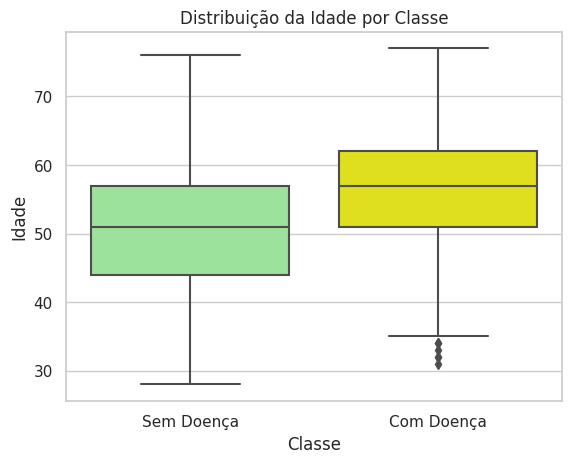

1. Os dados sugerem uma possível associação entre a idade e o risco de desenvolver doença cardíaca. Embora seja comum que o risco de doenças cardíacas aumente com a idade, a presença de outliers na classe com doença cardíaca sugere que essa relação pode não ser verdadeira em todos os casos. É importante considerar outros fatores e realizar análises mais detalhadas para compreender completamente essa associação.

In [221]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribuição da Idade por Classe')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.show()

display(Markdown("1. Os dados sugerem uma possível associação entre a idade e o risco de desenvolver doença cardíaca. Embora seja comum que o risco de doenças cardíacas aumente com a idade, a presença de outliers na classe com doença cardíaca sugere que essa relação pode não ser verdadeira em todos os casos. É importante considerar outros fatores e realizar análises mais detalhadas para compreender completamente essa associação."))

In [222]:
tabela_contagem = pd.crosstab(df['sex'], df['target'])
tabela_contagem.columns = ['Sem Doença', 'Com Doença']
tabela_contagem.index = ['Feminino', 'Masculino']
print("Contagem de pacientes com e sem doença cardíaca por sexo:")
print(tabela_contagem)


Contagem de pacientes com e sem doença cardíaca por sexo:
           Sem Doença  Com Doença
Feminino          211          70
Masculino         350         559


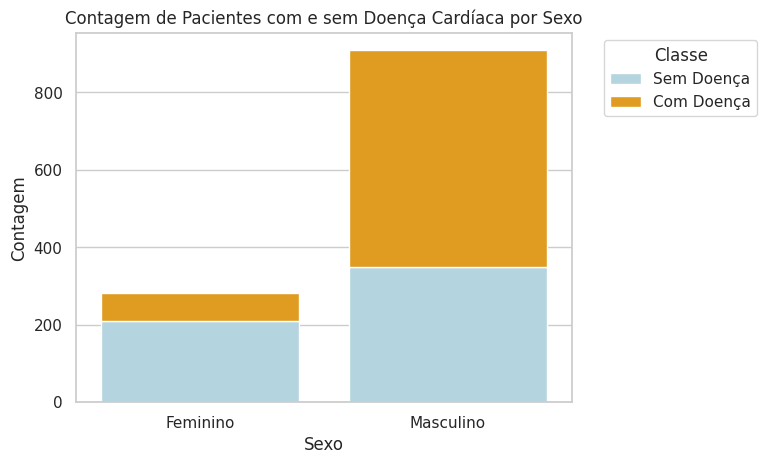

2. Com base na contagem de pacientes com e sem doença cardíaca por sexo, observa-se uma diferença significativa na prevalência da doença entre homens e mulheres. Os homens apresentam uma proporção maior de doença cardíaca em comparação com as mulheres, sugerindo uma possível associação entre sexo e risco de doença cardíaca.

In [223]:
sns.barplot(data=tabela_contagem, x=tabela_contagem.index, y='Sem Doença', color='lightblue', label='Sem Doença')
sns.barplot(data=tabela_contagem, x=tabela_contagem.index, y='Com Doença', color='orange', bottom=tabela_contagem['Sem Doença'], label='Com Doença')
plt.title('Contagem de Pacientes com e sem Doença Cardíaca por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

display(Markdown("2. Com base na contagem de pacientes com e sem doença cardíaca por sexo, observa-se uma diferença significativa na prevalência da doença entre homens e mulheres. Os homens apresentam uma proporção maior de doença cardíaca em comparação com as mulheres, sugerindo uma possível associação entre sexo e risco de doença cardíaca."))

In [224]:
contagem_dor_peito_por_classe = pd.crosstab(df['target'], df['chest pain type'])
contagem_dor_peito_por_classe.index = ['Sem Doença', 'Com Doença']
contagem_dor_peito_por_classe.columns = ['angina típica', 'angina atípica', 'dor não anginosa', 'assintomática']
print("Tabela de Contagem de Pacientes com e sem Doença Cardíaca por Tipo de Dor no Peito:")
print(contagem_dor_peito_por_classe)

Tabela de Contagem de Pacientes com e sem Doença Cardíaca por Tipo de Dor no Peito:
            angina típica  angina atípica  dor não anginosa  assintomática
Sem Doença             41             185               193            142
Com Doença             25              31                90            483


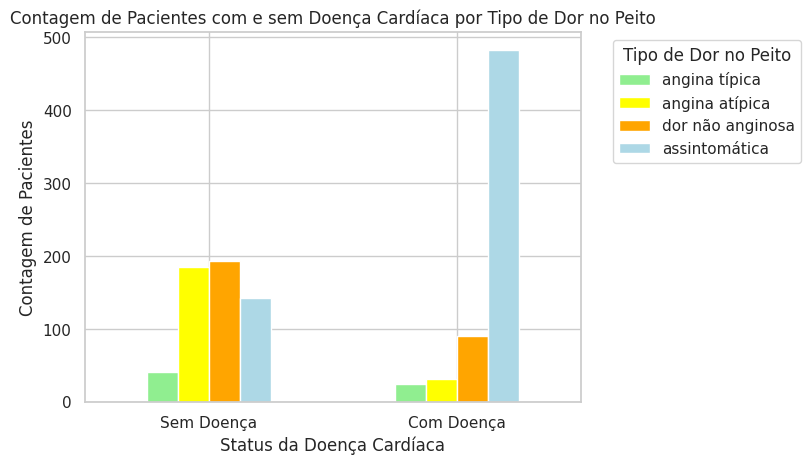

In [241]:
contagem_dor_peito_por_classe.plot(kind='bar')
plt.title('Contagem de Pacientes com e sem Doença Cardíaca por Tipo de Dor no Peito')
plt.xlabel('Status da Doença Cardíaca')
plt.ylabel('Contagem de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Dor no Peito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [226]:
pressao_por_classe = df.groupby('target')['resting bp s'].describe()
print("\nTabela de Estatísticas de Pressão Arterial por Classe de Doença:")
print(pressao_por_classe)


Tabela de Estatísticas de Pressão Arterial por Classe de Doença:
        count        mean        std   min    25%    50%    75%    max
target                                                                
0       561.0  129.793226  16.490474  80.0  120.0  130.0  140.0  190.0
1       629.0  134.259141  19.670323   0.0  120.0  132.0  145.0  200.0


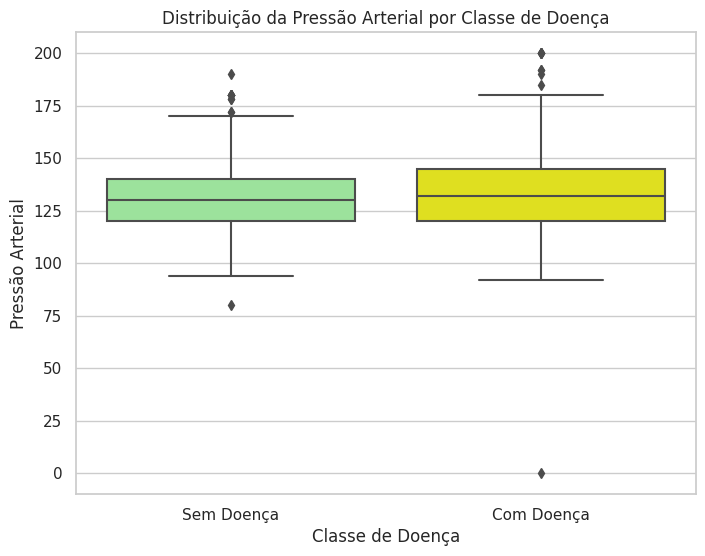

3. Os dados sugerem uma tendência de pressão arterial ligeiramente mais alta em pacientes com doença cardíaca em comparação com aqueles sem a doença. No entanto, a variabilidade nos dados e a presença de valores atípicos mostra que uma análise mais profunda se faz necessaária.

In [227]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='resting bp s', data=df)
plt.title('Distribuição da Pressão Arterial por Classe de Doença')
plt.xlabel('Classe de Doença')
plt.ylabel('Pressão Arterial')
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.show()

display(Markdown("3. Os dados sugerem uma tendência de pressão arterial ligeiramente mais alta em pacientes com doença cardíaca em comparação com aqueles sem a doença. No entanto, a variabilidade nos dados e a presença de valores atípicos mostra que uma análise mais profunda se faz necessaária."))


In [228]:
colesterol_por_classe = df.groupby('target')['cholesterol'].describe()
print("\nTabela de Estatísticas de Níveis de Colesterol por Classe de Doença:")
print(colesterol_por_classe)


Tabela de Estatísticas de Níveis de Colesterol por Classe de Doença:
        count        mean         std  min    25%    50%    75%    max
target                                                                
0       561.0  231.657754   70.021658  0.0  201.0  232.0  268.0  564.0
1       629.0  191.372019  119.734612  0.0  126.0  226.0  274.0  603.0


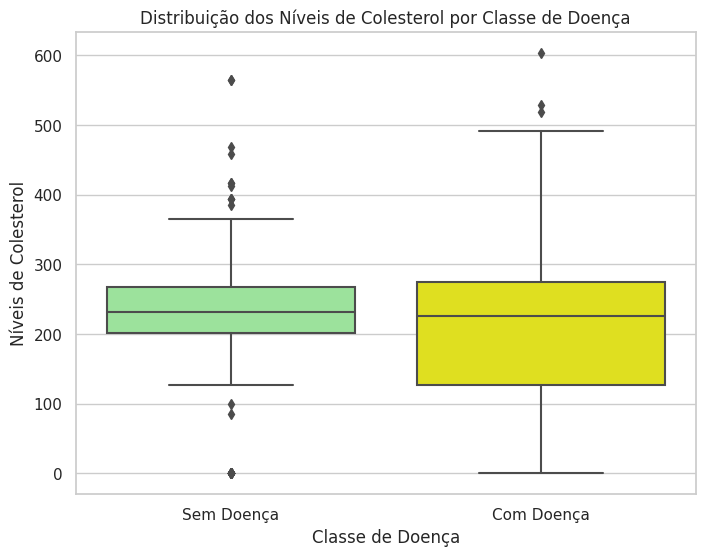

4. Essa análise sugere uma possível associação entre os níveis de colesterol e o risco de doença cardíaca, com pacientes com doença cardíaca tendo, em média, níveis de colesterol mais baixos. No entanto, a presença de valores atípicos e a variabilidade nos dados destacam a necessidade de uma análise mais detalhada.

In [229]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='cholesterol', data=df)
plt.title('Distribuição dos Níveis de Colesterol por Classe de Doença')
plt.xlabel('Classe de Doença')
plt.ylabel('Níveis de Colesterol')
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.show()

display(Markdown("4. Essa análise sugere uma possível associação entre os níveis de colesterol e o risco de doença cardíaca, com pacientes com doença cardíaca tendo, em média, níveis de colesterol mais baixos. No entanto, a presença de valores atípicos e a variabilidade nos dados destacam a necessidade de uma análise mais detalhada."))


In [230]:
contagem_ecg_por_classe = pd.crosstab(df['resting ecg'], df['target'])
contagem_ecg_por_classe.columns = ['Sem Doença', 'Com Doença']
contagem_ecg_por_classe.index = ['Normal', 'Anormalidade ST-T', 'Hipertrofia Ventricular Esquerda']
contagem_ecg_por_classe

,Sem Doença,Com Doença
Normal,353,331
Anormalidade ST-T,62,119
Hipertrofia Ventricular Esquerda,146,179


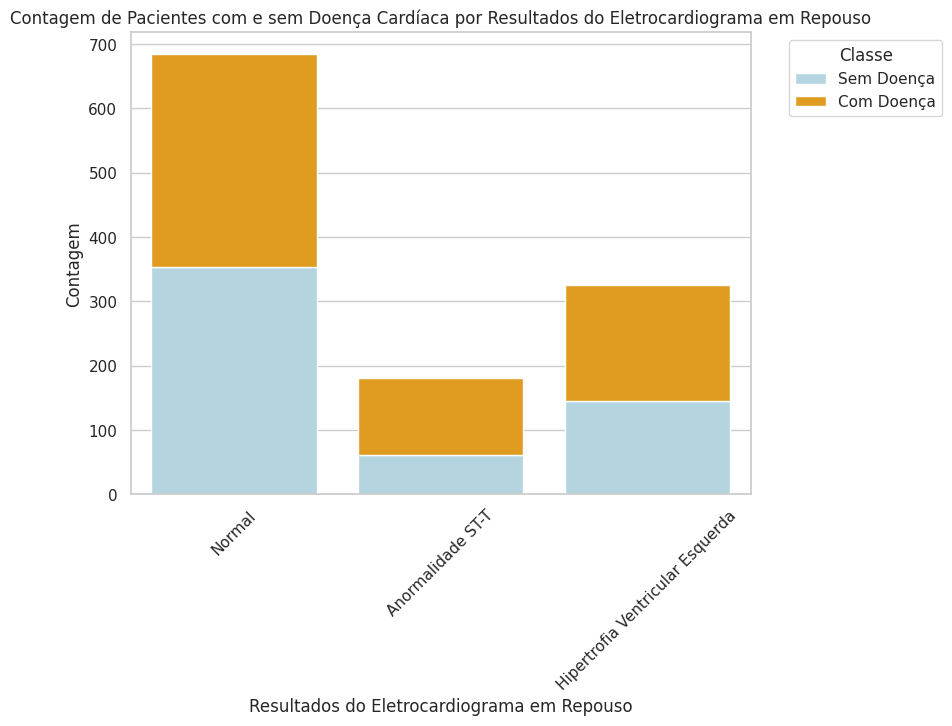

In [231]:
plt.figure(figsize=(8, 6))
sns.barplot(data=contagem_ecg_por_classe, x=contagem_ecg_por_classe.index, y='Sem Doença', color='lightblue', label='Sem Doença')
sns.barplot(data=contagem_ecg_por_classe, x=contagem_ecg_por_classe.index, y='Com Doença', color='orange', bottom=contagem_ecg_por_classe['Sem Doença'], label='Com Doença')
plt.title('Contagem de Pacientes com e sem Doença Cardíaca por Resultados do Eletrocardiograma em Repouso')
plt.xlabel('Resultados do Eletrocardiograma em Repouso')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [232]:
stats_max_heart_rate_por_classe = df.groupby('target')['max heart rate'].describe()
print("Tabela de Estatísticas da Frequência Cardíaca Máxima por Classe de Doença:")
print(stats_max_heart_rate_por_classe)

Tabela de Estatísticas da Frequência Cardíaca Máxima por Classe de Doença:
        count        mean        std   min    25%    50%    75%    max
target                                                                
0       561.0  150.894831  22.704971  69.0  137.0  154.0  169.0  202.0
1       629.0  129.777424  23.718521  60.0  113.0  128.0  147.0  195.0


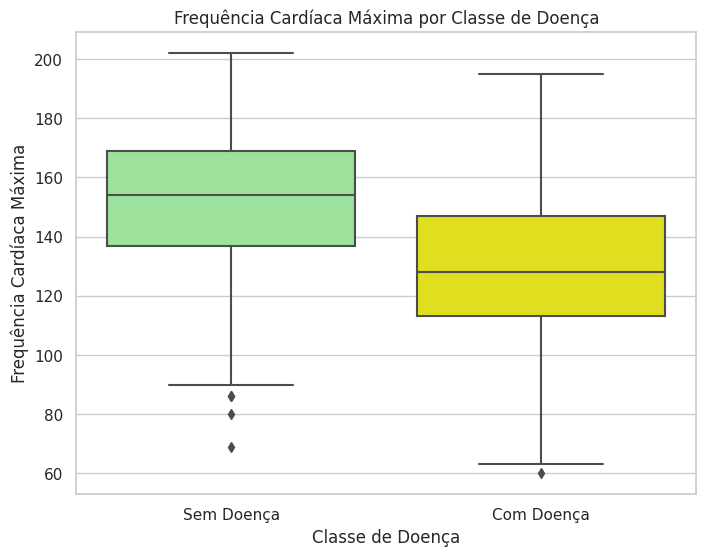

In [240]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='max heart rate')
plt.title('Frequência Cardíaca Máxima por Classe de Doença')
plt.xlabel('Classe de Doença')
plt.ylabel('Frequência Cardíaca Máxima')
plt.xticks(ticks=[0, 1], labels=['Sem Doença', 'Com Doença'])
plt.show()

In [234]:
contagem_angina_por_classe = pd.crosstab(df['exercise angina'], df['target'])
contagem_angina_por_classe.columns = ['Sem Doença', 'Com Doença']
contagem_angina_por_classe.index = ['Sem Angina', 'Com Angina']
print("\nTabela de Contagem de Pacientes com Angina por Classe de Doença:")
print(contagem_angina_por_classe)


Tabela de Contagem de Pacientes com Angina por Classe de Doença:
            Sem Doença  Com Doença
Sem Angina         483         246
Com Angina          78         383


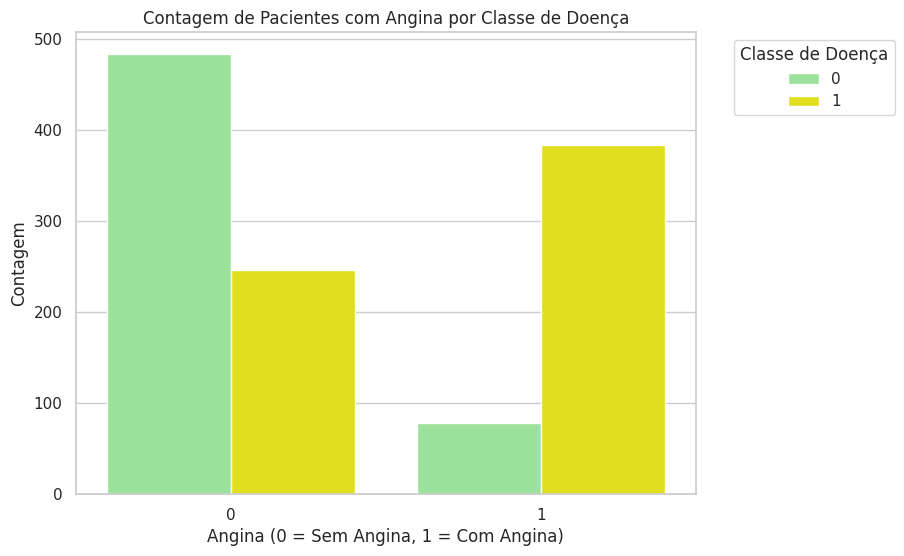

8. A maioria dos pacientes com doença cardíaca apresenta angina, enquanto a proporção é menor entre os pacientes sem doença cardíaca. Isso sugere que a presença de angina pode estar associada a um maior risco de desenvolver doença cardíaca.

In [235]:
plt.figure(figsize=(8, 6))
sns.countplot(x='exercise angina', hue='target', data=df)
plt.title('Contagem de Pacientes com Angina por Classe de Doença')
plt.xlabel('Angina (0 = Sem Angina, 1 = Com Angina)')
plt.ylabel('Contagem')
plt.legend(title='Classe de Doença', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

display(Markdown("8. A maioria dos pacientes com doença cardíaca apresenta angina, enquanto a proporção é menor entre os pacientes sem doença cardíaca. Isso sugere que a presença de angina pode estar associada a um maior risco de desenvolver doença cardíaca."))


In [236]:
stats_oldpeak_por_classe = df.groupby('target')['oldpeak'].describe()
print("Tabela de Estatísticas do Pico de Depressão do Segmento ST por Classe de Doença:")
print(stats_oldpeak_por_classe)

Tabela de Estatísticas do Pico de Depressão do Segmento ST por Classe de Doença:
        count      mean       std  min  25%  50%  75%  max
target                                                    
0       561.0  0.464706  0.733243 -1.1  0.0  0.0  0.8  4.2
1       629.0  1.331320  1.183346 -2.6  0.1  1.2  2.0  6.2


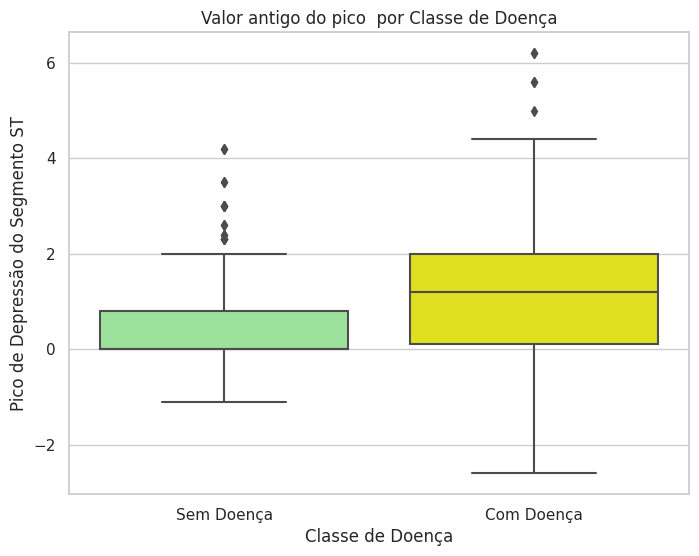

In [237]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='oldpeak')
plt.title('Valor antigo do pico  por Classe de Doença')
plt.xlabel('Classe de Doença')
plt.ylabel('Pico de Depressão do Segmento ST')
plt.xticks(ticks=[0, 1], labels=['Sem Doença', 'Com Doença'])
plt.show()

In [238]:
contagem_st_slope_por_classe = pd.crosstab(df['target'], df['ST slope'])
contagem_st_slope_por_classe = contagem_st_slope_por_classe.drop(0, axis=1)
contagem_st_slope_por_classe.index = ['Sem Doença', 'Com Doença']
contagem_st_slope_por_classe.columns = ['Ascendente', 'Plano', 'Descendente']
print("\nTabela de Contagem de Pacientes com e sem Doença Cardíaca por Pico do Segmento ST do Exercício:")
print(contagem_st_slope_por_classe)


Tabela de Contagem de Pacientes com e sem Doença Cardíaca por Pico do Segmento ST do Exercício:
            Ascendente  Plano  Descendente
Sem Doença         416    123           22
Com Doença         110    459           59


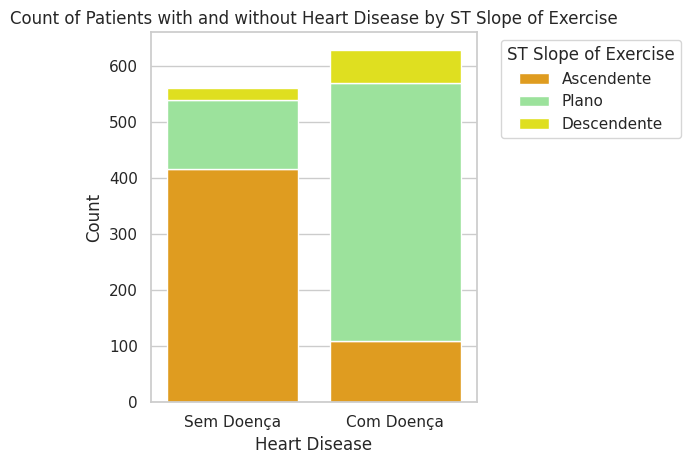

In [239]:
sns.barplot(data=contagem_st_slope_por_classe.reset_index(), x='index', y='Ascendente', color='orange', label='Ascendente')
sns.barplot(data=contagem_st_slope_por_classe.reset_index(), x='index', y='Plano', color='lightgreen', label='Plano', bottom=contagem_st_slope_por_classe['Ascendente'])
sns.barplot(data=contagem_st_slope_por_classe.reset_index(), x='index', y='Descendente', color='yellow', label='Descendente', bottom=contagem_st_slope_por_classe['Ascendente'] + contagem_st_slope_por_classe['Plano'])

# Setting title and axis labels
plt.title('Count of Patients with and without Heart Disease by ST Slope of Exercise')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Displaying the legend
plt.legend(title='ST Slope of Exercise', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


### Correlação entre as váriaveis

<Axes: >

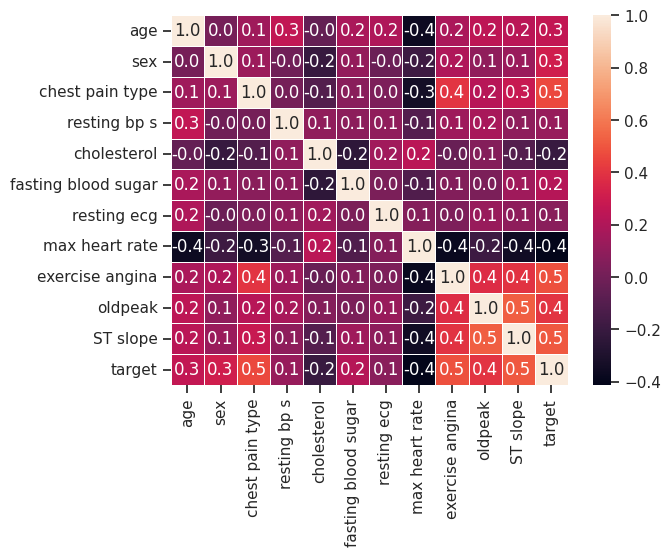

In [253]:
correlation = df.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

### Distribuição dos dados em relação a variável target

In [250]:
qualitative_colors = sns.color_palette("tab10", n_colors=2)

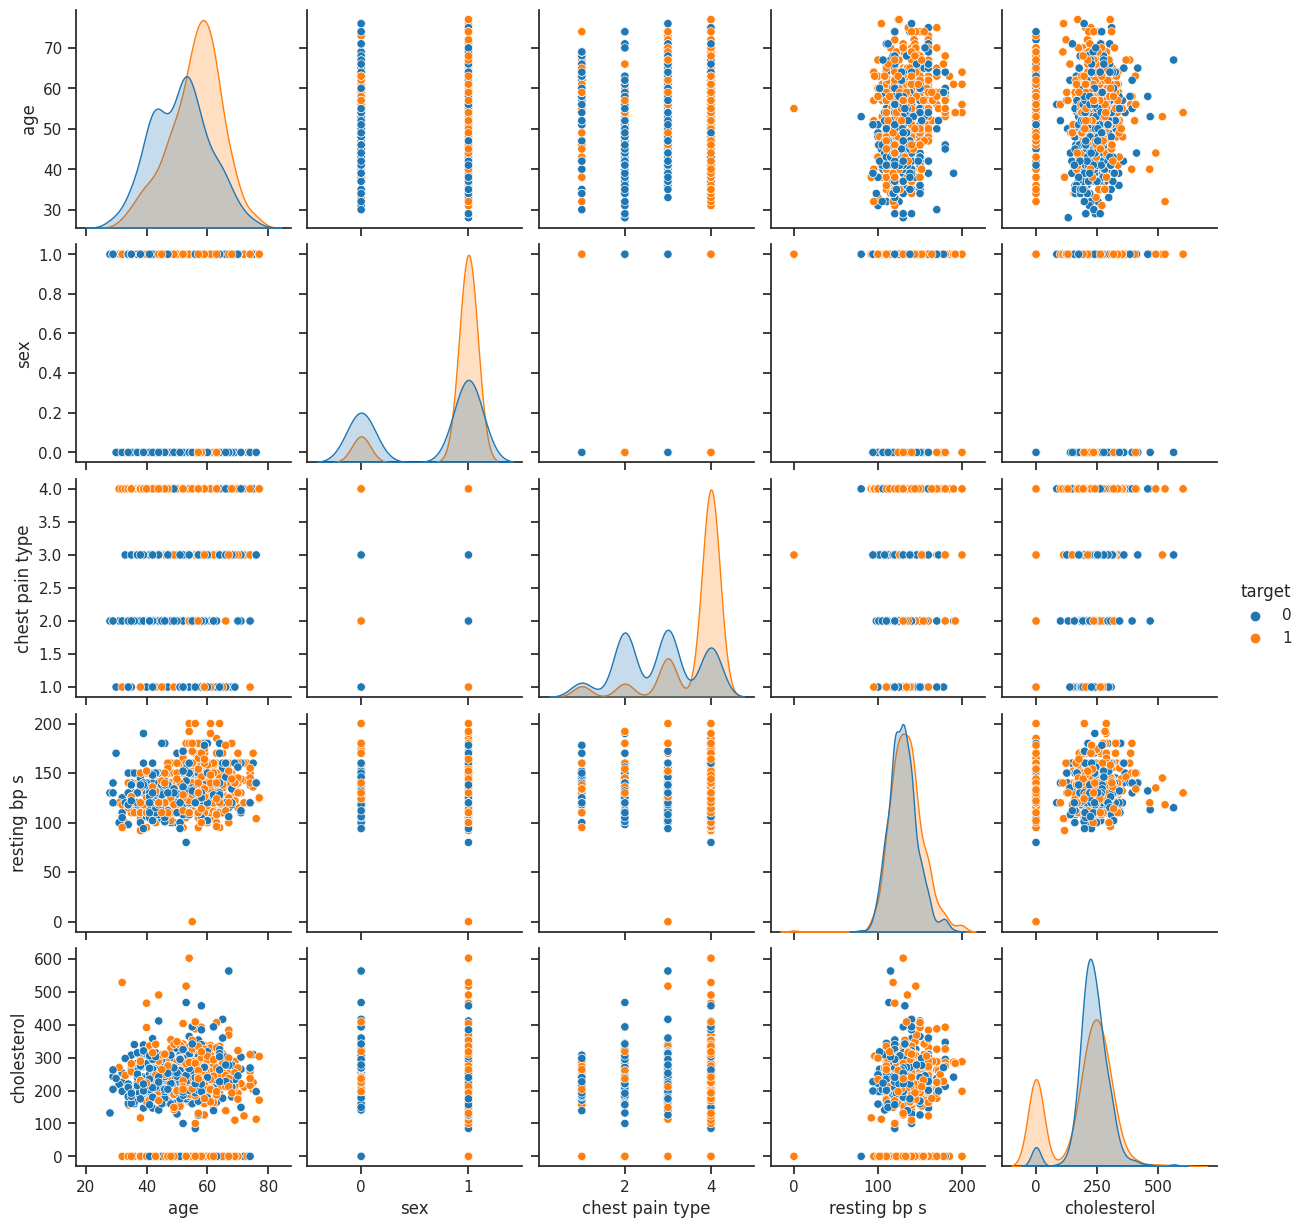

In [259]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data=df, vars=['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol'], hue='target', palette=qualitative_colors)

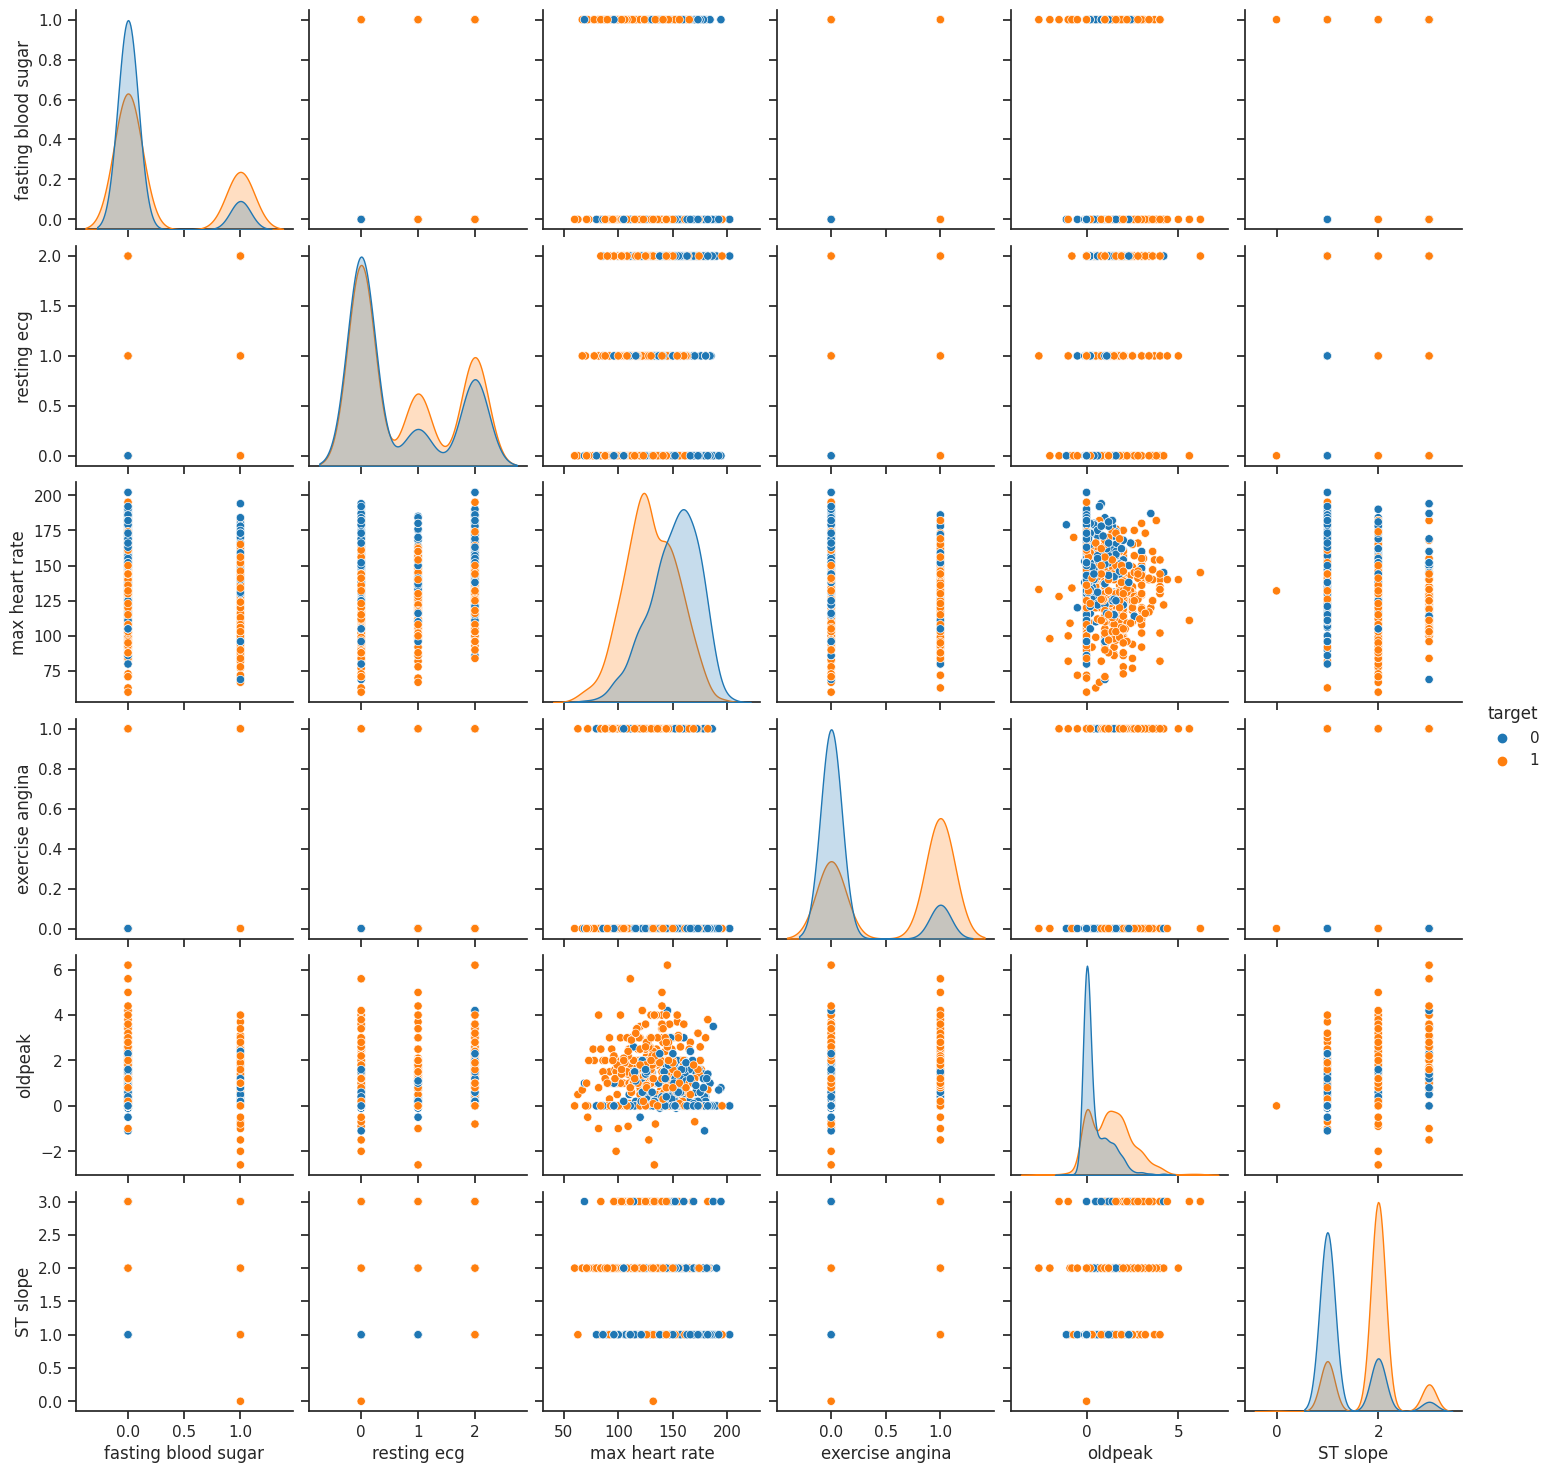

In [260]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data=df, vars=['fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'], hue='target', palette=qualitative_colors)